In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv("owid-covid-data.csv",na_values=np.nan)

In [94]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [95]:
df.shape

(123984, 65)

In [96]:
def find_missing_columns(data):
    columns = []
    no_of_null_values = []
    perc = []
    for col in data.columns:
        count = data[col].isnull().sum()
        if count > 0:
            columns.append(col)
            no_of_null_values.append(count)
            perc.append(count/len(data) * 100)
    df = pd.DataFrame({"Columns":columns,"No.Of Null Values":no_of_null_values,"Percentage_of_Null":perc})
    return df

In [97]:
pd.set_option("display.max_rows",200)
find_missing_columns(df)

,Columns,No.Of Null Values,Percentage_of_Null
0,continent,5623,4.535263
1,total_cases,6648,5.361982
2,new_cases,6652,5.365208
3,new_cases_smoothed,7666,6.183056
4,total_deaths,17521,14.131662
5,new_deaths,17368,14.008259
6,new_deaths_smoothed,7666,6.183056
7,total_cases_per_million,7265,5.859627
8,new_cases_per_million,7269,5.862853
9,new_cases_smoothed_per_million,8278,6.676668


In [98]:
def drop_cols_with_high_missing_values(data):
    cols_to_remove =[]
    count = []
    p = []
    for column in data.columns:
        perc = (data[column].isnull().sum() / len(data)) * 100
        if perc > 30 :
            cols_to_remove.append(column)
            count.append(data[column].isnull().sum())
            p.append(perc)
            data.drop(column,axis=1,inplace=True)
    deleted_df = pd.DataFrame({"Columns Dropped":cols_to_remove,"No.Of Null Values":count,"Percentage":p})
    return deleted_df

In [99]:
drop_cols_with_high_missing_values(df)

,Columns Dropped,No.Of Null Values,Percentage
0,icu_patients,108787,87.742773
1,icu_patients_per_million,108787,87.742773
2,hosp_patients,106642,86.012711
3,hosp_patients_per_million,106642,86.012711
4,weekly_icu_admissions,122708,98.970835
5,weekly_icu_admissions_per_million,122708,98.970835
6,weekly_hosp_admissions,121884,98.306233
7,weekly_hosp_admissions_per_million,121884,98.306233
8,new_tests,70782,57.089624
9,total_tests,70665,56.995257


In [100]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511


In [101]:
find_missing_columns(df)

,Columns,No.Of Null Values,Percentage_of_Null
0,continent,5623,4.535263
1,total_cases,6648,5.361982
2,new_cases,6652,5.365208
3,new_cases_smoothed,7666,6.183056
4,total_deaths,17521,14.131662
5,new_deaths,17368,14.008259
6,new_deaths_smoothed,7666,6.183056
7,total_cases_per_million,7265,5.859627
8,new_cases_per_million,7269,5.862853
9,new_cases_smoothed_per_million,8278,6.676668


In [102]:
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

In [103]:
cat_missing_cols = [col for col in missing_cols if col in df.select_dtypes(include="O")]

In [104]:
cat_missing_cols

['continent']

In [105]:
for col in cat_missing_cols:
    print(df[col].nunique())

6


In [106]:
for col in cat_missing_cols:
    df[col] = df[col].fillna(df[col].mode())

In [107]:
df['continent'].isnull().sum()

5623

In [108]:
num_missing_cols = [col for col in missing_cols if col not in cat_missing_cols]

In [109]:
num_missing_cols

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [110]:
for col in num_missing_cols:
    perc = df[col].isnull().sum() /len(df) * 100
    data_type = df[col].dtype
    if perc < 20 and data_type in ("float64","float32","int32","int64"):
        df[col] = df[col].fillna(df[col].median())

In [111]:
mode = df['continent'].value_counts().index[0]

In [112]:
df['continent'].fillna(mode,inplace=True)

In [113]:
df['continent']

0           Asia
1           Asia
2           Asia
3           Asia
4           Asia
           ...  
123979    Africa
123980    Africa
123981    Africa
123982    Africa
123983    Africa
Name: continent, Length: 123984, dtype: object

In [114]:
df['continent'].isnull().sum()

0

In [115]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,116.286,617.0,2.0,1.714,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,116.286,617.0,2.0,1.714,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,116.286,617.0,2.0,1.714,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,116.286,617.0,2.0,1.714,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,116.286,617.0,2.0,1.714,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511


In [116]:
df.groupby('location')['total_cases'].agg("max").sort_values()

location
Micronesia (country)            1.0
Kiribati                        2.0
Samoa                           3.0
Marshall Islands                4.0
Vanuatu                         4.0
                           ...     
United States            44884868.0
North America            53978042.0
Europe                   61657588.0
Asia                     77715997.0
World                   240070992.0
Name: total_cases, Length: 233, dtype: float64

In [117]:
df.groupby('location')['total_deaths'].agg("max").sort_values()

location
San Marino                    91.0
Nauru                        617.0
Sao Tome and Principe        617.0
Jersey                       617.0
Eritrea                      617.0
                           ...    
North America            1096509.0
Asia                     1151274.0
South America            1163054.0
Europe                   1261326.0
World                    4889737.0
Name: total_deaths, Length: 233, dtype: float64

In [118]:
df.groupby('continent')['total_deaths'].agg("max").sort_values()

continent
Oceania             1515.0
Europe            217382.0
Asia              451980.0
South America     602669.0
North America     723754.0
Africa           4889737.0
Name: total_deaths, dtype: float64

In [119]:
df.groupby('continent')['total_cases'].agg("max").sort_values()

continent
Oceania             141031.0
Europe             8400983.0
South America     21627476.0
Asia              34053573.0
North America     44884868.0
Africa           240070992.0
Name: total_cases, dtype: float64

In [120]:
df['year'] = pd.to_datetime(df['date'],format="%Y-%m-%d").dt.year

In [121]:
df['month'] = pd.to_datetime(df['date'],format="%Y-%m-%d").dt.month

In [122]:
df.groupby(['year','continent'])['total_deaths'].agg("sum")

year  continent    
2020  Africa           5.187256e+08
      Asia             4.022023e+07
      Europe           6.488612e+07
      North America    6.774096e+07
      Oceania          5.233270e+05
      South America    5.693854e+07
2021  Africa           2.250102e+09
      Asia             1.968809e+08
      Europe           2.883389e+08
      North America    2.466925e+08
      Oceania          2.205241e+06
      South America    2.412123e+08
Name: total_deaths, dtype: float64

In [123]:
find_missing_columns(df)

,Columns,No.Of Null Values,Percentage_of_Null


In [124]:
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

In [125]:
df.shape

(123984, 31)

In [131]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,year,month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,116.286,617.0,2.0,1.714,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,116.286,617.0,2.0,1.714,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,116.286,617.0,2.0,1.714,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,116.286,617.0,2.0,1.714,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,116.286,617.0,2.0,1.714,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2


<AxesSubplot:xlabel='location'>

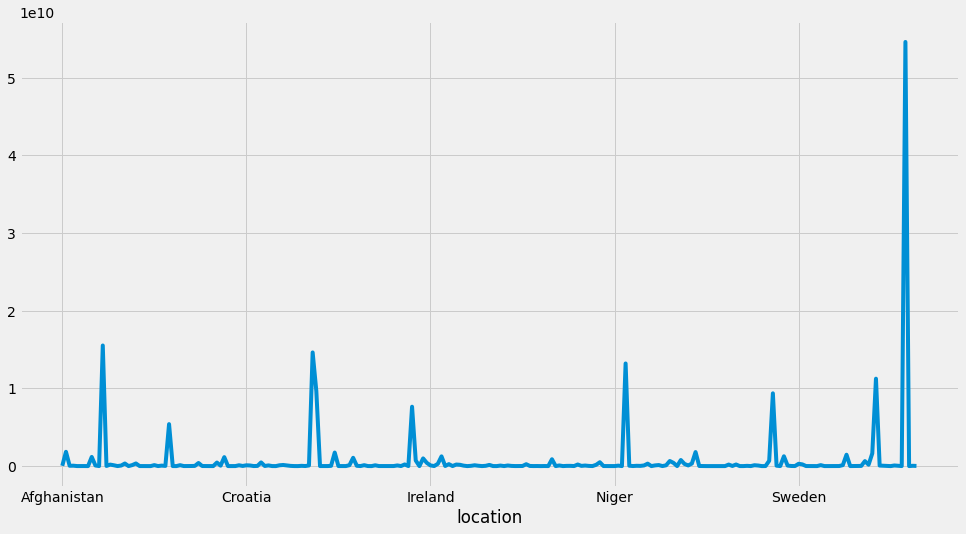

In [148]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
df.groupby('location')['total_cases'].agg("sum").plot()

<AxesSubplot:xlabel='location'>

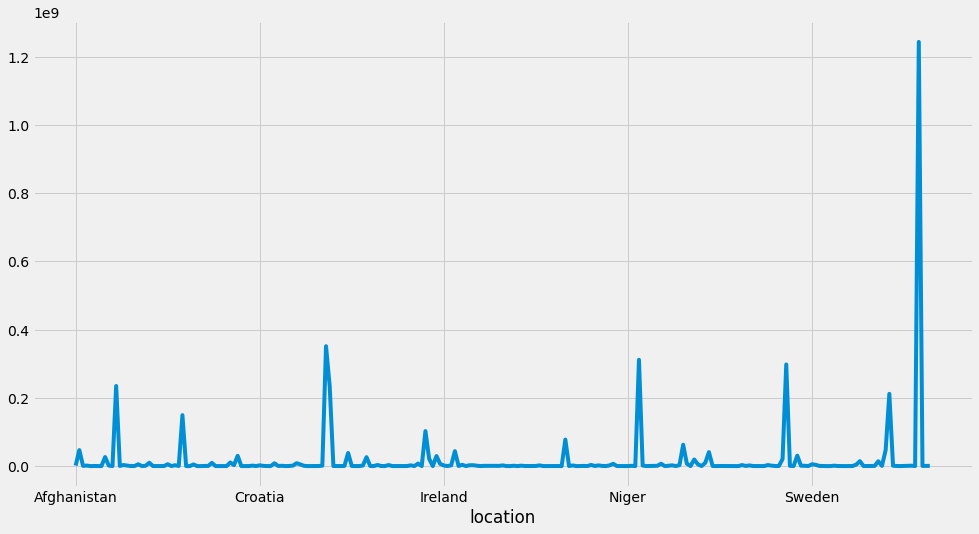

In [149]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
df.groupby('location')['total_deaths'].agg("sum").plot()

<AxesSubplot:xlabel='location'>

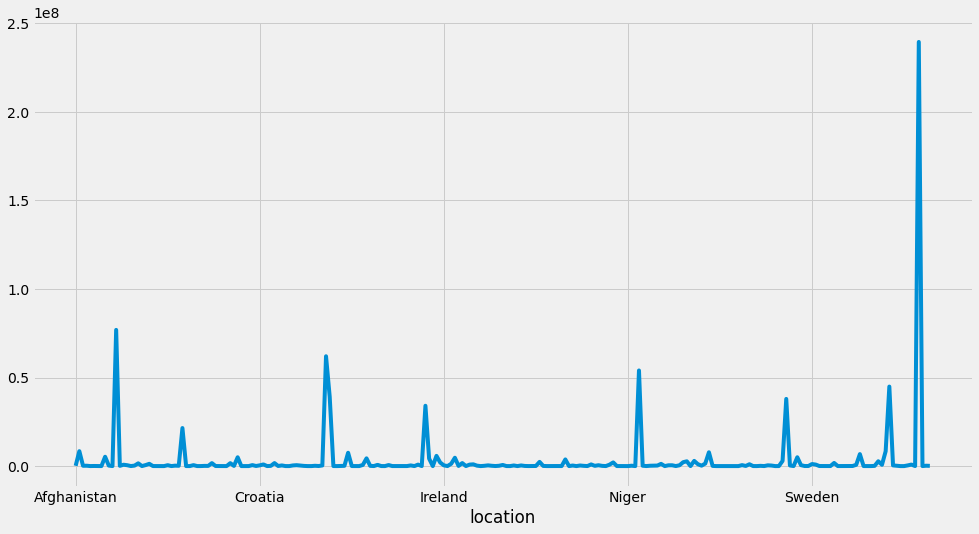

In [150]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
df.groupby('location')['new_cases'].agg("sum").plot()

<AxesSubplot:xlabel='location'>

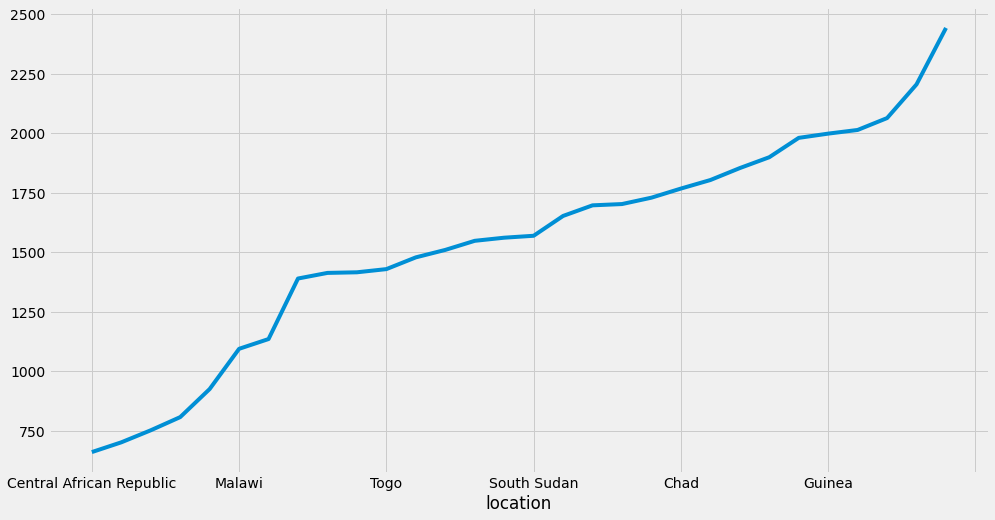

In [169]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
df.groupby('location')['gdp_per_capita'].mean().sort_values().head(30).plot()

In [163]:
pd.set_option("display.max_columns",200)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,year,month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,116.286,617.0,2.0,1.714,0.126,0.126,14.9865,71.193,0.155,0.196,1.01,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,116.286,617.0,2.0,1.714,0.126,0.000,14.9865,71.193,0.155,0.196,1.01,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,116.286,617.0,2.0,1.714,0.126,0.000,14.9865,71.193,0.155,0.196,1.01,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,116.286,617.0,2.0,1.714,0.126,0.000,14.9865,71.193,0.155,0.196,1.01,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,116.286,617.0,2.0,1.714,0.126,0.000,14.9865,71.193,0.155,0.196,1.01,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2020,2


In [170]:
df.to_csv("final_df.csv",)

In [171]:
pwd()

'C:\\Users\\Vinay Naman\\Desktop\\The Spark Foundation\\Covid -19 Analysis'